# Рекомендация тарифов

## Описание проекта
Оператор мобильной связи `Мегалайн` выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «`Смарт`» или «`Ультра`».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «`Статистический анализ данных`»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

## Цель выполнения проекта
Построение модели для задачи классификации (выбор подходящего тарифа мобильной связи) с максимально большим значением `accuracy`.

## Критерии успешной реализации проекта
Построение модели с максимально большим значением `accuracy`. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до `0.75`. 

Выполнить проверку `accuracy` на тестовой выборке самостоятельно.

Критерии оценки проекта, которыми руководствуются ревьюверы:

- как вы изучаете данные после загрузки?
- корректно ли разделяете данные на выборки?
- как выбираете размеры выборок?
- правильно ли вы оцениваете качество моделей в исследовании?
- какие модели и гиперпараметры вы используете?
- какие выводы об исследовании делаете?
- правильно ли тестируете модели?
- насколько высокое значение accuracy получаете?
- соблюдаете структуру проекта и поддерживаете аккуратность кода?

## Задачи проекта
В рамках проекта решается ряд задач, выполнение которых способствует достижению цели проекта:

1. [открытие файла с данными и изучение его](#Изучение-общей-информации)
    * загрузка библиотек
    * открытие датасета
    * определение целевого параметра
2. [разделение исходных данных на обучающую, валидационную и тестовую выборки](#Разделение-исходных-данных-на-выборки)
3. [исследование качества разных моделей, путём изменения гиперпараметров](#Исследование-модели)
    * исследование модели классификации деревом решений
    * исследование модели классификации - случайный лес
    * исследование модели классификации - логическая регрессия
    * краткие выводы исследования
4. [проверка качества модели на тестовой выборке](#Проверка-модели-на-тестовой-выборке)
5. [дополнительное задание: проверьте модели на вменяемость](#Проверка-модели-на-адекватность-(бонус)) 
6. [заполнение чек-листа готовности проекта](#Чек-лист-готовности-проекта)

## Исходные данные
Откройте файл с данными и изучите его. Путь к файлу: `/datasets/users_behavior.csv`.

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.

В датасете присутствуют следующие параметры:

- `сalls` — количество звонков,
- `minutes` — суммарная длительность звонков в минутах,
- `messages` — количество sms-сообщений,
- `mb_used` — израсходованный интернет-трафик в Мб,
- `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — `1`, «Смарт» — `0`).

## Выполнение проекта

### Изучение общей информации

Откройте файл с данными и изучите его. Путь к файлу `/datasets/users_behavior.csv`

#### Загрузка библиотек

In [39]:
from io import BytesIO                                  #  импорт модуля io из библиотеки для возможности работы с байтовыми данными

import requests                                         # импорт библиотеки requests для работы с HTTP-запросами и ответами

import pandas as pd                                     # импорт библиотеки pandas

import random                                           # импорт библиотеки random

import warnings                                         # импорт библиотеки для работы с предупреждениями в коде

from sklearn.linear_model import LogisticRegression     # импорт модели LogisticRegression из модуля sklearn.linear_model,
                                                        # реализующий алгоритм дерева решений для задач классификации

from sklearn.tree import DecisionTreeClassifier         # импорт функции DecisionTreeClassifier из модуля sklearn.tree

from sklearn.ensemble import RandomForestClassifier     # импорт функции RandomForestClassifier из модуля sklearn.ensemble

from sklearn.model_selection import train_test_split    # импорт функции train_test_split для разделения исходных данных на выборки


from joblib import dump                                 # импорт функции dump из библиотеки joblib, предназначенный 
                                                        # в т.ч. для загрузки результатов полученных вычислений

from sklearn.metrics import accuracy_score              # импорт функции accuracy_score для расчёта метрики качества

import matplotlib.pyplot as plt                         # импорт библиотеки для создания графиков и визуализации данных

import seaborn as sns                                   # импорт библиотеки для создания графиков, визуализации данных, расширяющее возможности mathplotlib

import plotly.graph_objs as go                          #  импорт модуля plotly.graph_objs для создания и настройки графиков в библиотеке plotly

from tqdm import tqdm                                   #  импорт модуля для использования прогресс-бара при выполнении длительных операций

from sklearn.dummy import DummyClassifier               # импорт библиотеки для сравнение прогноза нашей лучшей модели, с прогнозом наивной модели

#### Открытие датасета

Выполним открытие датасета и посмотрим инфо по типам данных, сделав первоначальный анализ имеющегося материала

In [40]:
spreadsheet_id = '1YtxDPfbp4TfFpuu3fv9BuLC_kPCIXoSz-UYei5gnHtc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [42]:
data.shape

(3214, 5)

Как видно, в датасете находится 3214 объекта и 5 признаков (хотя это итак указано в [условиях](Исходные-данные)), из которых один является целевым, а именно `is_ultra`. Собственно говоря, тариф, которым пользовался абонент, является единственным признаком, у которого целочисленный тип данных. В отличие от других, являющихся вещественными. В принципе, также к вещественному типу можно предложить привести и параметр (он же признак в терминах данного Проекта) `messages`, поскольку количество sms-сообщений не может быть дробным (абонент не может отправить полсообщения, как не в состоянии принять 3,14 сообщений). Но раз в условиях сказано, что предобработка данных была выполнена ранее, то мы обязаны принять данное ТЗ. 

Для датасета выполним проверку сбалансированности таргетов для целевого признака.

In [43]:
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Ввиду того, что значения не распределены примерно поровну, то можно считать, что таргеты не сбалансированы, что, в свою очередь, может привести к проблемам при обучении модели, поскольку она может склоняться к предсказанию объектов с наиболее частой меткой. 

Для решения этой проблемы можно использовать различные методы (например, уменьшение/увеличение количества объектов с наиболее частой меткой до уровня объектов с наименее частой меткой, а также генерация новых данных). Но в рамках обучения мы [возможно, не факт] будем использовать задание весов классам `0` и `1` в зависимости от их частоты в датасете. На текущий момент отношение количества случаев использования тарифа `Ultra` к числу использования тарифа `Smart` в течение месяца равно около `0.44`.

Также возможно выполнить проверку на мультиколлинеарность для исходного датасета. В результат получим матрицу корреляций между всеми столбцами (признаками) датасета. Если есть сильная корреляция между какими-то столбцами, то это может указывать на мультиколлинеарность. В таком случае можно рассмотреть возможность удаления одного из коррелирующих столбцов.

In [44]:
data.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


Мультиколлинеарность означает, что два или более признака сильно коррелируют друг с другом. В данном случае мы видим, что признаки `calls` и `minutes` имеют очень высокую корреляцию (0.982083), что говорит о сильной линейной зависимости между ними. Это может привести к проблемам при построении модели, т.к. сложно определить, какой из этих признаков вносит больший вклад в предсказание целевого признака. 

1. Для решения проблемы мультиколлинеарности, можно попробовать удалить один из признаков, которые сильно коррелируют друг с другом. В данном случае, можно удалить признак `calls`, т.к. он имеет меньшую корреляцию с целевым признаком `is_ultra` (0.207122 по сравнению с 0.206955 у `minutes`). В пункте "[Определение целевого параметра](#Определение-целевого-параметра)" данный момент будет освещён более подробно.

2. Возможно использовать методы регуляризации, такие как `L1` или `L2` регуляризация, чтобы уменьшить влияние мультиколлинеарности на модель. Принятие решение о регуляризации будет выполнено в ходе проведения исследования модели далее. 

#### Определение целевого параметра


Перед нами стоит цель выбора подходящего тарифа мобильной связи. Собственно говоря, в рассматриваемом датасете уже есть параметр `is_ultra`. Данный параметр категориальный, ввиду чего принимаем решение, что решаться будет задача классификации.

In [45]:
features = data.drop(['is_ultra', 'calls'], axis=1)       # объявление переменной признаков
target = data['is_ultra']                                 # объявление целевого признака

### Разделение исходных данных на выборки

В нашем распоряжении находится датасет, из которого необходимо сделать разделение на три выборки: обучающую (тренировочную), валидационную (на ней будет проверяться качество обученной модели) и тестовую. Подобная постановка задачи чётко указывает на отсутствие даже намёка на существование тестовой выборки. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1. 

Вначале разбиваем данные на обучающую (в названии фигурирует `_train`) и валидационно-тестовую (в названии `_validtest`) выборки в соотношении 3:2 (60% необходимо отвести под обучение модели), а затем уже делим валидационно-тестовую выборку на валидационную (`_valid`) и тестовую (`_test`) выборки в соотношении 1:1. 

In [46]:
#random.seed(42)

features_train, features_validtest, target_train, target_validtest = train_test_split(
    features,
    target,
    test_size=0.4, 
    stratify=target
)

In [47]:
#random.seed(42)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_validtest, 
    target_validtest, 
    test_size=0.5, 
    stratify=target_validtest
)

Выше подсчитано `data.shape`. Если просуммировать значения строк получившихся выборок, то видно, что ничего не потеряно. И действительно исходные данные разделены в заложенных пропорциях.

In [48]:
features_train.shape

(1928, 3)

In [49]:
features_valid.shape

(643, 3)

In [50]:
features_test.shape

(643, 3)

### Исследование модели

Рассмотрим три известные нам модели обучения для решения задачи классификации. _Логистическая регрессия_ подходит для задач с двумя классами, когда данные линейно разделимы. Модель _дерева решений_ подходит для задач, в которых признаки имеют нелинейную зависимость и когда нужно интерпретировать результаты. _Случайный лес_ подходит для задач с большим количеством признаков и когда нужно уменьшить переобучение.

Самое высокое качество accurancy среди представленных моделей у _случайного леса_, а _логистическая регрессия_ на втором месте. При этом _случайный лес_ является самой медленной моделью, что логично, если учесть, для каких целей он используется. Также крайне важно, что модель _случайного леса_ избыточна для нашего датасета. Конечно можно и на БелАЗе пассажиров возить, только зачем, если есть легковые авто.

В нашем случае в обучающей выборке присутствуют всего 4 признака. Для достижения поставленной цели - выбора подходящего тарифа мобильной связи - оптимальнее выбрать модель _логистической регрессии_, т.к. у нас всего два класса (0 и 1) и данные линейно разделимы. Кроме того, _логистическая регрессия_ хорошо работает с небольшим количеством признаков, что соответствует нашему датасету, в отличие от модели _случайного леса_. Также _логистическая регрессия_ позволит нам интерпретировать результаты и понять, какие признаки больше всего влияют на целевой признак `is_ultra`. Несмотря на перечисленные факторы, в рамках проекта также будет опробована модель _дерева решений_ в силу своей применимости для небольших выборок. Одним из факторов, которые не позволяют нам обратиться к модели _дерева решений_ обратиться в первую очередь, является возможность наличия проблемы пере/недообучения. Посмотрим, как в итоге сложится.

#### Исследование модели логистической регрессии

Выполним обучение модели на тренировочной выборке и посчитаем `accurancy`, используя гиперпараметры по-умолчанию

In [51]:
#random.seed(42)

# создание объекта модели логистической регрессии без явного указания заданных гиперпараметров
model_logreg = LogisticRegression(random_state=12345)

# обучение модели 
model_logreg.fit(features_train, target_train)

# определение метрики качества accuracy на тренировочной выборке в случае логистической регрессии
result_train_logreg = model_logreg.score(features_train, target_train)

print(f'Величина метрики качества accurancy на обучающей выборке {result_train_logreg}')

# предсказания на валидационной выборке
# predictions_valid = model_logreg.predict(features_valid)

# определение метрики качества accuracy на валидационной выборке в случае логистической регрессии
result_valid_logreg = model_logreg.score(features_valid, target_valid)

print(f'Величина метрики качества accurancy на валидационной выборке {result_valid_logreg}')

Величина метрики качества accurancy на обучающей выборке 0.7012448132780082
Величина метрики качества accurancy на валидационной выборке 0.702954898911353


Как видно, результат ни в одном из случаев (главным образом, на обучающей выборке) не достиг необходимой величины в 75% правильных ответов. Используем изменение значений гиперпараметров.

##### Использование трёх значений гиперпараметров

Исходя из [официальной документации](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) на библиотеку `scikit-learn`, для модели _LogisticRegression_ существует ряд параметров, из которых наиболее важными являются следующие:

- `random_state` - начальное значение для генератора случайных чисел
- `solver` - алгоритм оптимизации (newton-cg, lbfgs, liblinear, sag или saga)
- `max_iter` - максимальное количество итераций для оптимизации
- `penalty` - тип регуляризации (l1, l2, elasticnet или none)
- `C` - обратная сила регуляризации (чем больше значение C, тем меньше регуляризация)
- `tol` - критерий остановки оптимизации
- `class_weight` - веса классов для учета дисбаланса классов

Из данного перечня применим параметры `random_state`, `solver` и `max_iter`

In [52]:
#random.seed(42)
warnings.filterwarnings('ignore')

for solver_type in ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']:
    model_logreg = LogisticRegression(random_state=12345, solver=solver_type, max_iter=100000)
    model_logreg.fit(features_train, target_train)
    result_train_logreg = model_logreg.score(features_train, target_train)
    print(f'Величина метрики качества accurancy при значении гиперпараметра solver={solver_type} на тренировочной выборке равна: {result_train_logreg}')

Величина метрики качества accurancy при значении гиперпараметра solver=liblinear на тренировочной выборке равна: 0.7012448132780082
Величина метрики качества accurancy при значении гиперпараметра solver=lbfgs на тренировочной выборке равна: 0.7012448132780082
Величина метрики качества accurancy при значении гиперпараметра solver=newton-cg на тренировочной выборке равна: 0.7515560165975104
Величина метрики качества accurancy при значении гиперпараметра solver=sag на тренировочной выборке равна: 0.6991701244813278
Величина метрики качества accurancy при значении гиперпараметра solver=saga на тренировочной выборке равна: 0.6976141078838174


Обращает на себя внимание, что практически удаётся достигнуть необходимого значения правильных ответов обучающейся модели при использовании алгоритма оптимизации `newton-sg`. Ввиду этого добавим гиперпараметры `tol` и `penalty`, равный `l2` (это указывает на использование L2-регуляризации, и параметр C=1.0). Всё в соответствии с путём, оговорённым в ходе выявления [проблемы мультиколлинеарности](#Открытие-датасета).

In [53]:
#random.seed(42)
warnings.filterwarnings('ignore')

model_logreg = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=100000, tol=0.001, penalty='l2', C=1.0)
model_logreg.fit(features_train, target_train)
result_train_logreg = model_logreg.score(features_train, target_train)
print(f'Величина метрики качества accurancy на обучающей выборке равна: {result_train_logreg}') 

Величина метрики качества accurancy на обучающей выборке равна: 0.7515560165975104


##### Проверка модели на валидационной выборке

На обучающейся выборке по итогу так и не достигнуто требуемое значение. Подсчитаем его для валидационной выборки (вдруг и в случае модели логистической регрессии наблюдается недообучение).

In [54]:
print('Значения Accurancy на различных выборках:')
print("Значения Accurancy на обучающей выборке равно", model_logreg.score(features_train, target_train))
print("Значения Accurancy на валидационной выборке равно", model_logreg.score(features_valid, target_valid))

Значения Accurancy на различных выборках:
Значения Accurancy на обучающей выборке равно 0.7515560165975104
Значения Accurancy на валидационной выборке равно 0.7402799377916018


Как видно, значения на валидационной выборке приблизительно равны значениям на обучающей выборке (даже чуть выше, т.е. есть небольшое переобучение). 

##### Выводы по результатам исследования

Несмотря на то, что наиболее распространённым является алгоритм `lbfgs` гиперпараметра `solver`, для нашей модели наилучший результат обучения дало применение алгоритма `newton-cg`. Они оба относятся к оптимизационным алгоритмам, которые используются для обучения моделей ML, а отличаются способом вычисления градиента и гессиана функции потерь.

Алгоритм lbfgs (Limited-memory Broyden-Fletcher-Goldfarb-Shanno) использует ограниченную память для хранения предыдущих значений градиента и использует их для приближенного вычисления гессиана. Он является быстрее и менее требовательным к памяти, чем алгоритм newton-cg, но может иметь проблемы с сходимостью на некоторых задачах. Алгоритм newton-cg (Newton's conjugate gradient) использует точное вычисление градиента и гессиана функции потерь, что делает его более точным, но также более медленным и требовательным к памяти. Однако на нашем довольно небольшой выборке (даже изначальный датасет составлял всего 3214 объекта) различия в скоростях вычислений для указанных алгоритмов практически не заметны.

Ввиду того, что алгоритм `newton-cg` показал удовлетворяющие условию результаты в обучаемой модели, то есть смысл его использовать далее. Однако, стоит учитывать, что помимо выбора оптимизационного алгоритма потребовалась также дополнительная настройка гиперпараметров, таких как `tol` и `penalty`.

Модель логистической регрессии показывает примерно одинаковую точность на обучающей и валидационной выборках, что может говорить о ее стабильности и непереобученности. Однако, точность модели на всех выборках не очень высока и составляет около 0.74-0.75. Необходимо провести дополнительный анализ и оптимизацию модели для улучшения ее качества.

Для улучшения качества модели логистической регрессии можно попробовать следующие методы:

1. Подбор гиперпараметров: можно использовать методы перебора гиперпараметров, например, [GridSearchCV](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv) или RandomizedSearchCV, чтобы определить оптимальные значения гиперпараметров модели. Например, можно изменять значения параметров C, tol, max_iter, penalty и solver.

2. Использование других моделей: если точность модели логистической регрессии не удовлетворяет требованиям, можно попробовать использовать другие модели машинного обучения, такие как `случайный лес` или `дерево решений`.

3. Балансировка классов: если классы в целевой переменной несбалансированы, то можно использовать методы балансировки классов, такие как oversampling или undersampling, чтобы улучшить качество модели (это было нагуглено, но пока подобное реализовать не готов).

#### Перебор гиперпараметров GridSearchCV

Перебор гиперпараметров **GridSearchCV** приводит к ряду сообщений и крайне длительной работе. Ввиду чего тут представлены количественные гиперпараметры, которые в итоге были безошибочно проанализированы и на их основе сформирован наиболее оптимальный перечень.

In [55]:
%%time

from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(random_state=12345)

parametrs = { 
    'max_iter': [1000, 10000, 100000, 1000000],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'tol': [0.001, 0.01, 0.1, 1, 10, 100]
            }
grid_search = GridSearchCV(clf, parametrs, cv=5)
grid_search.fit(features_train, target_train)
grid_search.best_params_

CPU times: user 10.2 s, sys: 192 ms, total: 10.4 s
Wall time: 10.4 s


{'C': 0.01, 'max_iter': 1000, 'tol': 0.001}

In [56]:
%%time
best_score = grid_search.best_score_
best_score

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 15 µs


0.7329008815019178

Величина `accurancy` тут ещё ниже, нежели в случае логистической регрессии. 

На основе переборе сформированы следующие оптимальные значения гиперпараметров:

    - 'C': 0.001, 
    - 'max_iter': 1000, 
    - 'tol': 0.001
    
Используем их на обучающей выборке вместе с гиперпараметрами `solver` и `penalty`, показавшими наилучший результат.

In [57]:
model_logreg = LogisticRegression(
    random_state=12345,
    C=0.001, 
    solver='lbfgs',
    max_iter=1000, 
    tol=0.001
                                 )
model_logreg.fit(features_train, target_train)
result_train_logreg = model_logreg.score(features_train, target_train)
print(f'Величина метрики качества accurancy на валидационной выборке равна: {result_train_logreg}') 

Величина метрики качества accurancy на валидационной выборке равна: 0.7012448132780082


In [58]:
warnings.filterwarnings('ignore')

model_logreg = LogisticRegression(
    random_state=12345,
    C=0.001, 
    solver='newton-cg', 
    penalty='l2', 
    max_iter=1000, 
    tol=0.001
                                 )
model_logreg.fit(features_train, target_train)
result_train_logreg = model_logreg.score(features_train, target_train)
print(f'Величина метрики качества accurancy на валидационной выборке равна: {result_train_logreg}') 

Величина метрики качества accurancy на валидационной выборке равна: 0.7515560165975104


Увы, также и тут результат получается подобный. Значение качества модели при использовании перебора `GridSearchCV` на требуемую величину в 0.75 влияет слабо. Далее `GridSearchCV` рассматривать не будем.

#### Сравнения с другими моделями классификации

Ввиду "натянутого" результата работы модели `логистической регрессии` само собой напрашивается применение иных моделей по оговорённому выше плану.

##### Исследование модели классификации деревом решений


In [59]:
# создание объекта модели классификации деревом решений
model_tree_cl = DecisionTreeClassifier(random_state=12345)

# обучение модели 
model_tree_cl.fit(features_train, target_train)

# предсказания значения целевой переменной для обучающей выборки
train_predictions = model_tree_cl.predict(features_train)

# предсказания значения целевой переменной для валидационной выборки
valid_predictions = model_tree_cl.predict(features_valid)

# предсказания значения целевой переменной для тестовой выборки
#test_predictions = model_tree_cl.predict(features_test)

In [60]:
print('Величина метрики качества accurancy на обучающей выборке равна:', accuracy_score(target_train, train_predictions))
print('Величина метрики качества accurancy на валидационной выборке равна:', accuracy_score(target_valid, valid_predictions))

Величина метрики качества accurancy на обучающей выборке равна: 1.0
Величина метрики качества accurancy на валидационной выборке равна: 0.7293934681181959


Если принять, как данность значение `accurancy`, равно 1, что подразумевает отсутствие ошибок при обучении модели
Налицо случай переобучения. Ввиду того, что переобучение характерно для моделей с большой величиной глубины дерева, необходимо провести изменить соответствующие гиперпараметры. Рассматриваемые гиперпараметры можно вывести командой `model_tree_cl.get_params()`, а их описание взять из [официальной документации](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier):

- `criterion` - функция для измерения качества разбиения
- `splitter` - стратегия выбора разбиения в каждом узле
- `max_depth` - максимальная глубина дерева

- `min_samples_split=2` - минимальное количество экземпляров, которое может содержаться в узле для дальнейшего разбиения
- `min_samples_leaf=1` - минимальное количество экземпляров, которое может содержаться в листе
- `min_weight_fraction_leaf=0.0` - минимальная взвешенная часть суммы всех весов входных экземпляров, необходимых в листовом узле
- `max_features` - максимальное количество фичей, которые рассматриваются при выборе лучшего разбиения
- `random_state` - начальное состояние генератора случайных чисел
- `max_leaf_nodes` - максимальное количество листьев
- `min_impurity_decrease` - минимальное уменьшение неоднородности
- `class_weight` - вес класса в виде
- `ccp_alpha` - сложность стоимости

Оптимальные значения гиперпараметров для подбора можно взять из [документации Kaggle](https://www.kaggle.com/code/zohrab/rus-sklearn-decisiontreeclassifier-hyperparams), поскольку в ней расписано достаточно ясно. Используем первые три.

Посчитаем значение `accurancy` при заданных трёх значениях гиперпараметров. Сравним предсказанное в ходе обучения на тренировочной выборке значение доли правильных ответов и отношение числа правильных ответов к тестовой выборке. Сведём всё в одну таблицу, поскольку значений у нас всего должно получиться 28, а таблица более проста в чтении для такого числа строк.

In [61]:
%%time

result_train_tree_cl = pd.DataFrame(
    columns=[
        'Качество разбиения выборки criterion', 
        'Стратегия выбора разбиения выборки splitter', 
        'Глубина дерева обучения max_depth', 
        'Величина метрики качества accurancy на обучающей выборке', 
        'Величина метрики качества accurancy на валидационной выборке'
            ]
                                   )

criterion_types = ['gini', 'entropy']
splitter_types = ['best', 'random']
class_weights = {0: 1, 1: 2}

for criterion_type in criterion_types:
    for depth in range(1,8):
        for splitter_type in splitter_types:
            model_tree_cl = DecisionTreeClassifier(
                random_state=12345,
                criterion=criterion_type, 
                splitter=splitter_type, 
                max_depth=depth, 
                class_weight=class_weights
                                                  )
            model_tree_cl.fit(features_train, target_train)
            train_predictions = model_tree_cl.predict(features_train)
            accurancy_train_tree_cl = accuracy_score(target_train, train_predictions)
            valid_predictions = model_tree_cl.predict(features_valid)
            accurancy_valid_tree_cl = accuracy_score(target_valid, valid_predictions)
            result_train_tree_cl = result_train_tree_cl.append({'Величина метрики качества accurancy на обучающей выборке': accurancy_train_tree_cl,
                                                                'Величина метрики качества accurancy на валидационной выборке': accurancy_valid_tree_cl,
                                                                'Качество разбиения выборки criterion': criterion_type, 
                                                                'Стратегия выбора разбиения выборки splitter': splitter_type, 
                                                                'Глубина дерева обучения max_depth': depth}, ignore_index=True
                                                            )

CPU times: user 287 ms, sys: 7.98 ms, total: 295 ms
Wall time: 293 ms


In [62]:
display(result_train_tree_cl.sort_values('Величина метрики качества accurancy на обучающей выборке', ascending=False))

,Качество разбиения выборки criterion,Стратегия выбора разбиения выборки splitter,Глубина дерева обучения max_depth,Величина метрики качества accurancy на обучающей выборке,Величина метрики качества accurancy на валидационной выборке
12,gini,best,7,0.838174,0.771384
10,gini,best,6,0.830913,0.776050
26,entropy,best,7,0.829876,0.754277
22,entropy,best,5,0.823133,0.790047
8,gini,best,5,0.822614,0.774495
24,entropy,best,6,0.811203,0.754277
18,entropy,best,3,0.800311,0.788491
4,gini,best,3,0.799274,0.785381
16,entropy,best,2,0.787863,0.771384
2,gini,best,2,0.786307,0.769829


Для представления влияния гиперпараметра splitter на обучающую и валидационные выборки построим график. В т.ч. график отображает влияния зависимости глубины дерева обучения на величину точности модели дерева решений. 

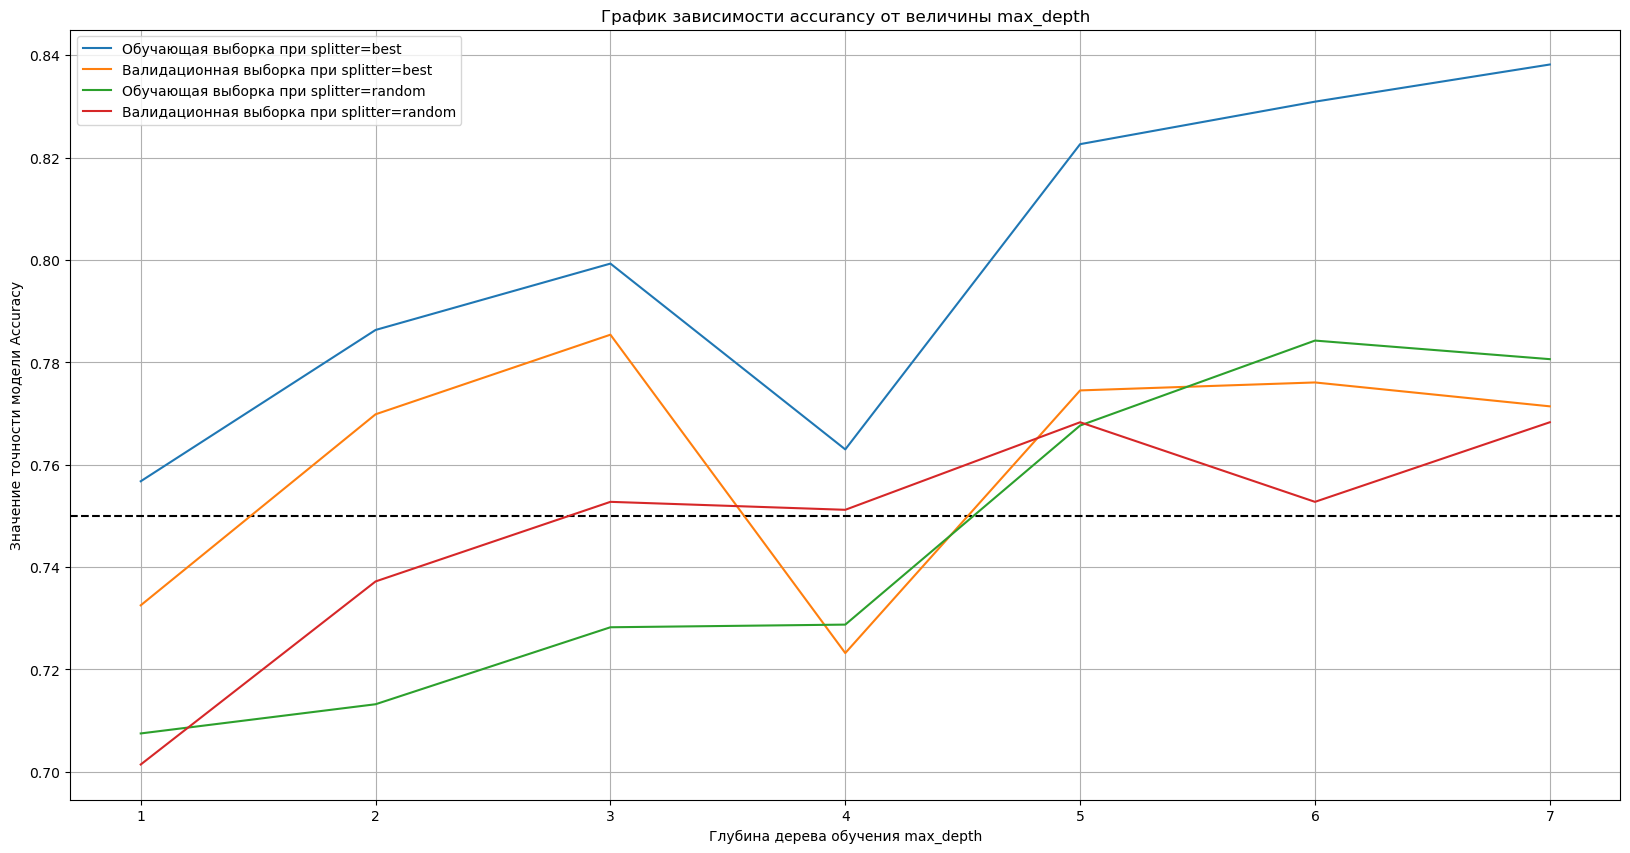

In [63]:
plt.figure(figsize=(20, 10))
plt.axhline(y=0.75, color='black', linestyle='--')

splitters = ['best', 'random']
    
for splitter in splitters:
    result_train_tree_cl_splitter = result_train_tree_cl[result_train_tree_cl['Стратегия выбора разбиения выборки splitter'] == splitter]

    accuracies_train = []
    accuracies_valid = []

    for depth in range(1, 8):
        accuracies_train.append(
            result_train_tree_cl_splitter[result_train_tree_cl_splitter['Глубина дерева обучения max_depth'] == depth]['Величина метрики качества accurancy на обучающей выборке'].values[0]
                               )
        accuracies_valid.append(
            result_train_tree_cl_splitter[result_train_tree_cl_splitter['Глубина дерева обучения max_depth'] == depth]['Величина метрики качества accurancy на валидационной выборке'].values[0]
                               )

    plt.plot(range(1, 8), accuracies_train, label='Обучающая выборка при splitter={}'.format(splitter))
    plt.plot(range(1, 8), accuracies_valid, label='Валидационная выборка при splitter={}'.format(splitter))

plt.grid()
plt.title('График зависимости accurancy от величины max_depth')
plt.xlabel('Глубина дерева обучения max_depth')
plt.ylabel('Значение точности модели Accuracy')
plt.legend()
plt.show()

Мы оказались посрамлены, когда при [принятии решения сделали ставку на модель _логистической регрессии_ в пользу перед моделью _дерева решений_](#Исследование-модели). На деле _дерево решений_ куда как с меньшей ошибкой выдаёт результат. 

В таблице выше данные отсортированы по величине метрики качества на обучающей выборке. Невооружённым глазом видно, как при увеличении глубины дерева обучения ошибка обучения снижается. Однако `max_depth` далеко не единственный гиперпараметр, вляющий на улучшение метрики качества. 

Также нам видится важным гиперпараметром `splatter`. Наибольшие значения метрики качества демонстрируются при использовании значения `best` стратегии выбора разбиения выборки. При идентичных значениях `max_depth` метрика качества выше именно у `best`. А вот гиперпараметр качества разбиения выборки показывает примерно одинаковые результаты в системе с двумя другими гиперпараметрами. Т.е. прямой зависимости между значениями `criterion` и числом ошибок обучения выборки не обнаружено.

Достичь необходимый результат в 0.75 возможно уже при следующих гиперпараметрах: max_depth=`4` и splitter=`best`. Ввод весов классов при обучении модели свёл к минимуму случай с переобучением, что было заметно в первой итерации. С другой стороны, в зависимости от величины датасета отличие в 5-10% между значениями `accurancy` на разных выборках может быть и допустимым. У нас же стоит чёткая цель - доведение числа верных ответов хотя бы до 0.75. 

##### Исследование модели классификации - случайный лес

В принципе поставленная цель может считаться достигнутой, но, поскольку у нас стоит задача исследования модели квалификации `случайный лес`, то необходимо её выполнить

In [64]:
# создание объекта модели классификации случайный лес
model_ran_for = RandomForestClassifier(random_state=12345, n_estimators=3)

# обучение модели 
model_ran_for.fit(features_train, target_train)

# предсказания значения целевой переменной для обучающей выборки
train_predictions = model_ran_for.predict(features_train)

# предсказания значения целевой переменной для валидационной выборки
valid_predictions = model_ran_for.predict(features_valid)

# предсказания значения целевой переменной для тестовой выборки
test_predictions = model_ran_for.predict(features_test)

print('Величина метрики качества accurancy на обучающей выборке равна:', accuracy_score(target_train, train_predictions))
print('Величина метрики качества accurancy на валидационной выборке равна:', accuracy_score(target_valid, valid_predictions))

Величина метрики качества accurancy на обучающей выборке равна: 0.9512448132780082
Величина метрики качества accurancy на валидационной выборке равна: 0.7433903576982893


Вновь, как и в случае с `деревом решений` при гиперпараметрах, выставленных по-умолчанию (как в теории _ЯП_), значения метрики качества на обучающей выборке гораздо выше, нежели на выборках валидационной и тестовой. Перечислим гиперпараметры, которыми будем оперировать, и наиболее применимые их значения:

- `n_estimators` - количество деревьев в лесу (чаще всего принимает значения от 10 до 100)
- `max_depth` - максимальная глубина дерева (чаще всего принимает значения от 5 до 20)
- `min_samples_split` - минимальное количество наблюдений, необходимое для того, чтобы узел мог быть разделен (чаще всего принимает значения от 2 до 10)
- `min_samples_leaf` - минимальное количество наблюдений в листе дерева (чаще всего принимает значения от 1 до 5)
- `max_features` - количество признаков, используемых для поиска наилучшего разделения (чаще всего принимает значения от sqrt(features) до features).
- `criterion` - функция для измерения качества разбиения

Используем первые два параметра, а также традиционно вес классов.

In [65]:
%%time
result_train_ran_for = pd.DataFrame(columns=['Количество деревьев в лесу n_estimators', 'Глубина дерева обучения max_depth', 'accurancy_train_ran_for', 'accurancy_valid_ran_for'])
class_weights = {0: 1, 1: 2}

for depth in tqdm(range(1,9,1)):
    for est in tqdm(range(1,101,2)):
        model_ran_for = RandomForestClassifier(
            random_state=12345,
            n_estimators=est, 
            max_depth=depth, 
            class_weight = class_weights
                                              )
        model_ran_for.fit(features_train, target_train)
        train_predictions = model_ran_for.predict(features_train)
        accurancy_train_ran_for = accuracy_score(target_train, train_predictions)
        valid_predictions = model_ran_for.predict(features_valid)
        accurancy_valid_ran_for = accuracy_score(target_valid, valid_predictions)
        result_train_ran_for = result_train_ran_for.append(
            {
                    'accurancy_train_ran_for': accurancy_train_ran_for,
                    'accurancy_valid_ran_for': accurancy_valid_ran_for,
                    'Количество деревьев в лесу n_estimators': est,
                    'Глубина дерева обучения max_depth': depth
            }, 
            ignore_index=True
        )

100%|██████████████████████████████████████████████████████████████████████| 8/8 [00:38<00:00,  4.83s/it]

CPU times: user 38.6 s, sys: 132 ms, total: 38.7 s
Wall time: 38.6 s


Для смотрибельности построим графики

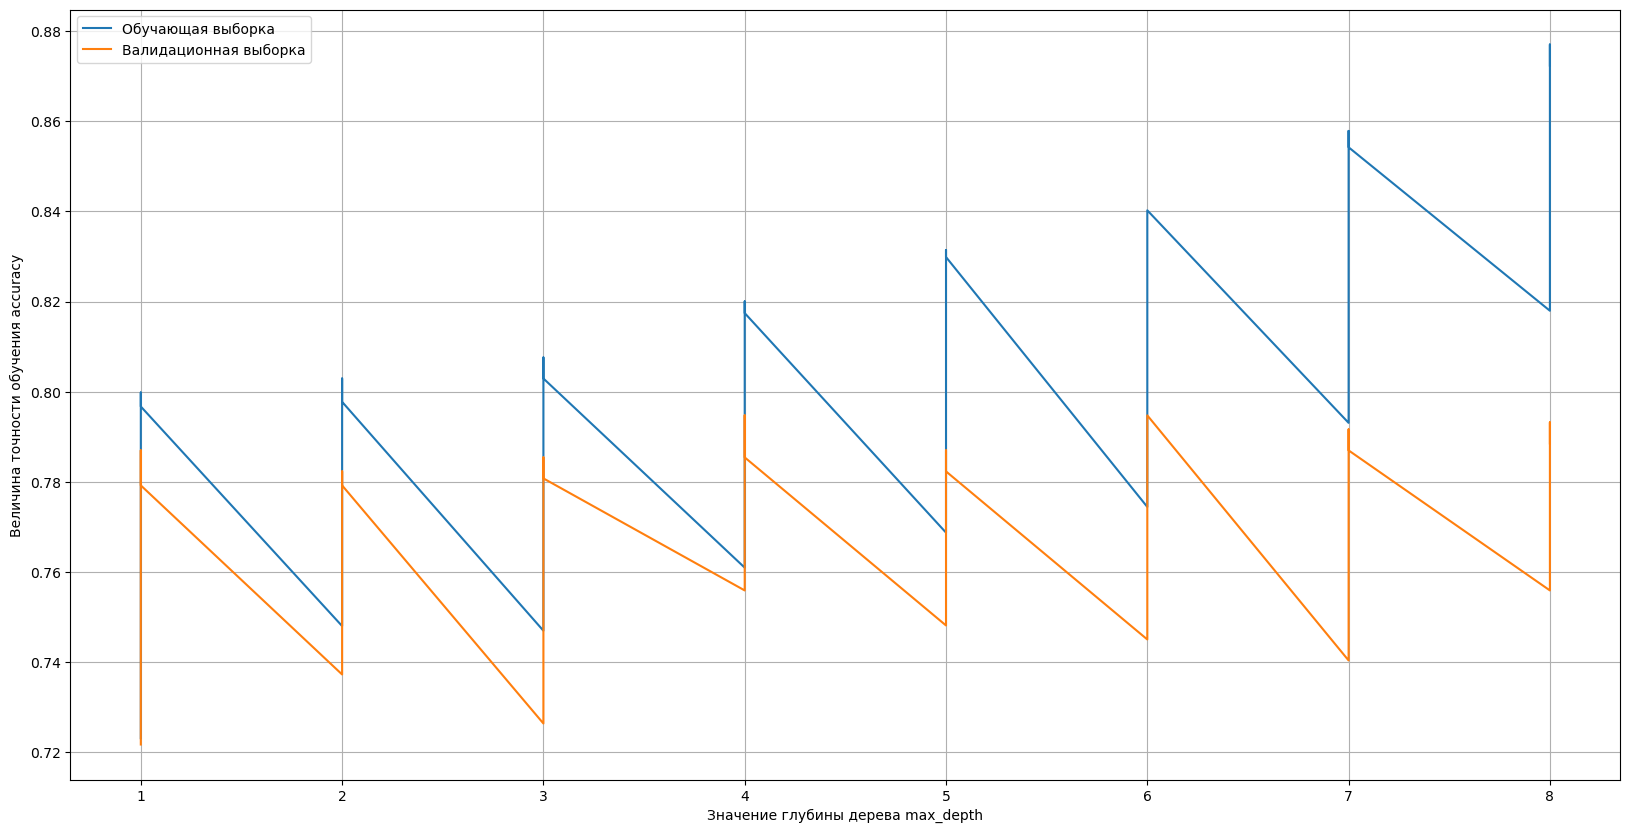

In [66]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(
    result_train_ran_for['Глубина дерева обучения max_depth'], 
    result_train_ran_for['accurancy_train_ran_for'], 
    label='Обучающая выборка'
        )
plt.plot(
    result_train_ran_for['Глубина дерева обучения max_depth'], 
    result_train_ran_for['accurancy_valid_ran_for'], 
    label='Валидационная выборка'
        )
plt.xlabel('Значение глубины дерева max_depth')
plt.ylabel('Величина точности обучения accuracy')
plt.legend()
plt.show() 

In [67]:
x = result_train_ran_for['Количество деревьев в лесу n_estimators']
y = result_train_ran_for['Глубина дерева обучения max_depth']
z1 = result_train_ran_for['accurancy_train_ran_for']
z2 = result_train_ran_for['accurancy_valid_ran_for']

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=x, y=y, z=z1, mode='markers+lines', name='Обучающая выборка'))
fig.add_trace(go.Scatter3d(x=x, y=y, z=z2, mode='markers+lines', name='Валидационная выборка'))

fig.update_layout(scene=dict(
                    xaxis_title='Количество деревьев в лесу n_estimators',
                    yaxis_title='Глубина дерева обучения max_depth',
                    zaxis_title='Величина метрики качества accurancy'),
                  legend=dict(
                    y=0.99,
                    x=0.01),
                  width=1200,
                  height=1200
                 )

fig.show()

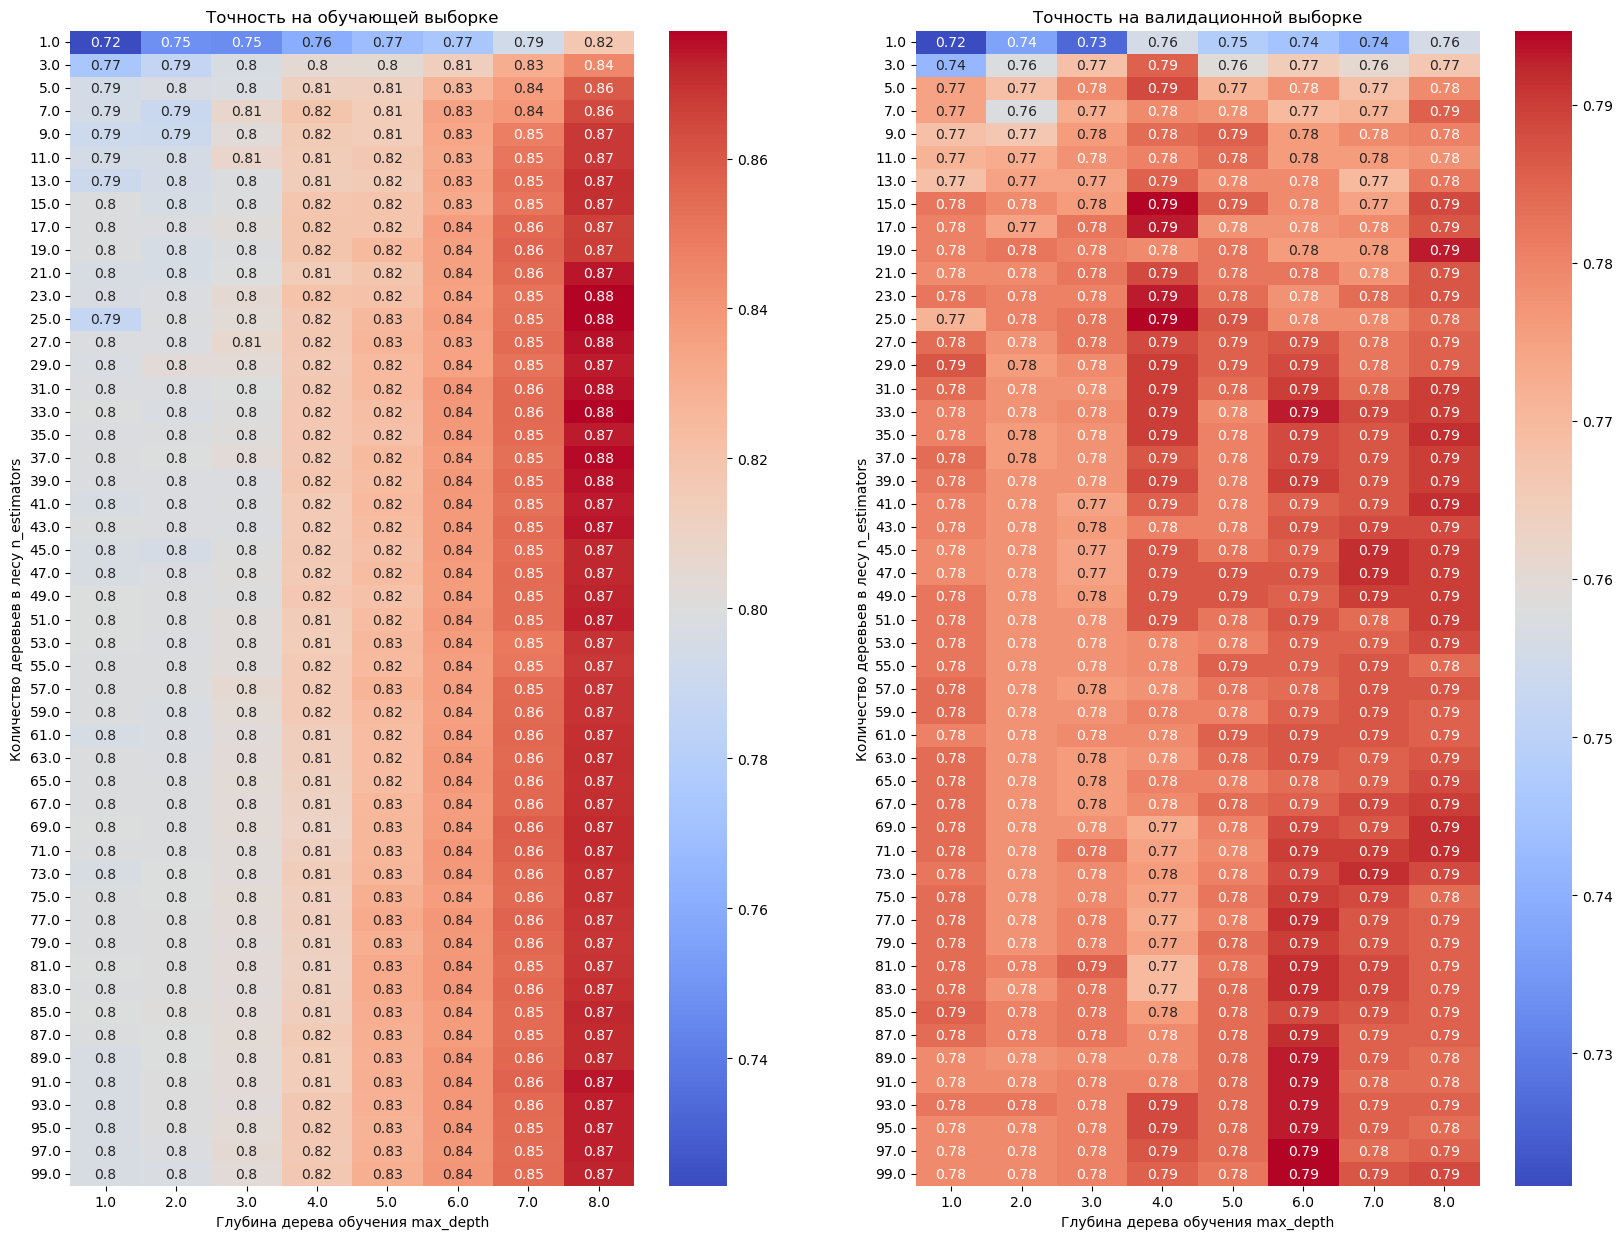

CPU times: user 3.75 s, sys: 284 ms, total: 4.03 s
Wall time: 3.77 s


In [68]:
%%time
result_train_ran_for_pivot_valid = result_train_ran_for.pivot(
    index='Количество деревьев в лесу n_estimators',
    columns='Глубина дерева обучения max_depth',
    values='accurancy_valid_ran_for'
)

result_train_ran_for_pivot_train = result_train_ran_for.pivot(
    index='Количество деревьев в лесу n_estimators',
    columns='Глубина дерева обучения max_depth',
    values='accurancy_train_ran_for'
)

plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 2)
sns.heatmap(result_train_ran_for_pivot_valid, cmap='coolwarm', annot=True)
plt.xlabel('Глубина дерева обучения max_depth')
plt.ylabel('Количество деревьев в лесу n_estimators')
plt.title('Точность на валидационной выборке')

plt.subplot(1, 2, 1)
sns.heatmap(result_train_ran_for_pivot_train, cmap='coolwarm', annot=True)
plt.xlabel('Глубина дерева обучения max_depth')
plt.ylabel('Количество деревьев в лесу n_estimators')
plt.title('Точность на обучающей выборке')

plt.show()

In [69]:
result_train_ran_for[result_train_ran_for['Глубина дерева обучения max_depth'] <= 7].sort_values(
    by='accurancy_valid_ran_for', 
    ascending=False
                                                                                                 )

,Количество деревьев в лесу n_estimators,Глубина дерева обучения max_depth,accurancy_train_ran_for,accurancy_valid_ran_for
157,15.0,4.0,0.818465,0.794712
162,25.0,4.0,0.817427,0.794712
298,97.0,6.0,0.838693,0.794712
299,99.0,6.0,0.840249,0.794712
161,23.0,4.0,0.820021,0.793157
...,...,...,...,...
1,3.0,1.0,0.774378,0.741835
300,1.0,7.0,0.793050,0.740280
50,1.0,2.0,0.747925,0.737170
100,1.0,3.0,0.746888,0.726283


В случае использования модели квалификации `случайный лес` редко, когда критерий качества для валидационной выборки достигает 0.85. При больших значениях `accurancy` разрыв между значениями для обучающей и валидационной выборками растёт и становится существенным. Собственно говоря, график это подтверждает. Видно, как при значениях глубины дерева больше `12` значение метрики качества для обучающей выборки отделяется на **второй космической скорости** от аналогичного показателя для выборки валидационной. Напрашивается логичный вывод о целесообразности использовать в нашей модели max_depth не более 11-12 (на деле ниже).

И, да, действительно нужно [подтвердить описанный выше факт](#Исследование-модели) - данная модель действительно самая медленная. 

Наилучший результат, удовлетворяющий цели проектной работы, достигается при `глубине` в минимум деревьев - тогда сразу несколько `деревьев` дают совпадение `accurancy`. При этом величины значений метрики качества выше в целом для большего числа "экспериментов".

Самый главный вывод здесь таков. Как и предсказывалось, для выборки с малым числом признаков модель случайного леса является оптимальной, хотя и показывает результаты, сравнимые с моделью `дерева решений`. 

#### Проверка выбранной модели на тестовой выборке

Расчёт для тестовой выборки будем строить на модели `случайного леса`, несмотря на то, что изначально результаты, полученные на ней, нас не вполне удовлетворили, что также было характерно и для модели методом `логической регрессии`. Однако после переобучения на меньшем числе глубин деревьев (как и для модели квалификации дерева решений) ситуация исправилась. На модели случайного леса всё ещё присутствуют случаи переобучения, однако результат `accurancy` на валидационной выборке вполне удовлетворяет цели Проекта. 

На отметить, что на модели _логистической регрессии_ было испробовано больше гиперпараметров, но всё же проверка на валидационной выборке показывает результаты, схожие с моделью _случайного леса_. Ожидается, что эти модели покажут в целом схожие результаты на тестовой выборке. Может быть, да

In [70]:
test_predictions = model_ran_for.predict(features_test)
print(
    'Величина метрики качества accurancy на тестовой выборке равна', 
    accuracy_score(target_test, test_predictions)
     )

Величина метрики качества accurancy на тестовой выборке равна 0.8055987558320373


Как видно по итогу величина метрики качества более 0.77, что неплохо. Прекрасно!

### Проверка модели на адекватность (бонус) 

Проверку модели на адекватность выполним с использованием [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Однако гиперпараметры никакие использовать не будем, поскольку нет необходимости в них копаться, а задание необязательное. 

In [71]:
model_dummycl = DummyClassifier(strategy='most_frequent')
model_dummycl.fit(features_train, target_train)
target_pred = model_dummycl.predict(features_train)
accuracy = accuracy_score(target_train, target_pred)
print('Значение метрики качества accuracy на предсказательной модели DummyClassifier', accuracy)

Значение метрики качества accuracy на предсказательной модели DummyClassifier 0.6934647302904564


Как видно, значение приблизительно соответствует значению, вычисленному выше. Но что наиболее важно, значение в 0.69 соответствует отношению в датасете `0` и `1` в целевом признаке `is_ultra`. Буквально проверяется: 2229 делим на 3214 и получаем 0.693528313627878. Т.е. совпадение очень близкое, однако.

## Общий вывод

В рамках Проектной работы перед нами стояла цель построения модели для задачи классификации (_выбор подходящего тарифа мобильной связи_) с максимально большим значением `accuracy`. Для достижения данной цели был предоставлен датасет в виде файла формата `*.csv`, содержащий информацию о количестве и суммарной длительности звонков в минутах, количестве sms-сообщений, а также размере интернет-трафика в Мб в разрезе одного из двух используемых тарифов.

В рамках выполнения Проекта был проведён ряд работ, которые привели к достижению необходимой цели.

1. Проанализирован датасет, на основе чего сделано предположение об избыточности некоторых имеющихся признаков для решения задачи классификации. Таким образом, в дальнейшем моделировании не использовался признак `calls`, а в качестве целевого признака был избран `is_ultra` (т.е. тариф мобильной связи).

2. Выполнено изучение поступившего после предобработки данных датасета. На его основе сформировано три выборки: обучающую (она же `тренировочная`), `валидационная` (на ней проводилась проверка обучения для каждой конкретной модели классификации) и `тестовая` (для проверки на "чистых" данных верности выбора модели классификации с наилучшими показателями метрики правильных ответов при решении задачи классификации) в отношении 3:1:1.

3. В рамках выполнения Проектной работы появилась необходимость использовать сторонние библиотеки, импорт которых производился по мере выявления потребностей. Однако в целях удобства работы все модули и библиотеки, используемые при расчётах сведены вместе. Тем самым можно оценить насколько полноценно может выглядеть деятельность по ML для достижения поставленной цели.

4. В ходе предварительного анализа имеющегося датасета было принято решение считать наиболее оптимальной моделью для решения задачи классификации модель логистической регрессии. В ходе обучения и валидации данной модели были применены такие гиперпараметры, как регуляция весов классов (в датасете всего два класса), алгоритм оптимизации и количество итераций для достижения оптимизации. 

5. Полученные результаты обучения модели логистической регрессии выявили общее достижения поставленной цели в необходимости получения метрики качества `accurancy` в 0.75, но, что называется, на грани. В связи с этим также был опробован (но только в качестве средства подбора гиперпараметров) метод `GridSearchCV`. После чего осуществлён переход на применение другим моделей решения задачи классификации.

6. В ходе решения задачи классификации методом `дерева решений` были получены более оптимальные значения метрики качества числа правильных ответов. При этом определены гиперпараметры модели, способствующие более точному совпадению метрики качества на обучающей и валидационной метриках. 

7. В ходе решения задачи классификации методом `случайный лес` полученные результаты показали, что наиболее оптимально использовать в ходе обучения глубину дерева порядка не более 5-7 (собственно говоря, как и у _дерева решений_). Однако сама модель показала достаточно длительное выполнение при обучении, что было предсказуемо. 

8. На основе выбранной модели классификации _случайного леса_ была выполнена проверка на тестовой выборке. Результат подтвердил правоту выбранного решения. Ура!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
